<a href="https://colab.research.google.com/github/ALDO12062004/PROCESOS-EST-CASTICOS/blob/main/Caminata_aleatoria_1D__Orozco_Ramos_Aldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAMINATA ALEATORIA

Código que implementa una camita aleatoria 1D, con probabilidad $p$ de moverse a la derecha y probabilidad $q$ de moverse a la izquierda, tal que $$p + q = 1.$$

Se importan las librerias:


*   Random para generar números aleatorios pertenecientes a una distribución uniforme, es decir, números entre $0$ y $1.$
* Numpy para cálculos con arreglos y funciones
*   Matplotlib.pyplot para gráficar

In [4]:
import random as r
import numpy as np
import matplotlib.pyplot as plt

Definimos una secuencia de variables aleatorias $X_1, X_2, \dots, X_n$ donde cada $X_i$ representa un paso.

Definimos la función para la pisición final
$$ x_i = +1 \hspace{0.2cm}{\text{con probabilidad $p$ a la derecha}}  $$
$$ x_i = -1 \hspace{0.2cm}{\text{con probabilidad $q$ a la izquierda}}  $$

In [5]:
def caminata_aleatoria(n,p):
  posicion=0
  camino=[posicion]
  for i in range(n):
    a=r.random() #Generamos números aleatorios entre 0,1
    if a < p:
      posicion=posicion+1 #Éxito: sube
    else:
      posicion=posicion-1 #Fracaso: baja
    camino.append(posicion)
  plt.plot(camino, color='blue')
  plt.title("Caminata Aleatoria")
  plt.xlabel("Número de pasos")
  plt.ylabel("Posición")
  plt.axhline(0.0, linestyle='--', color='red')
  plt.grid(True)
  plt.show()

  return camino

* **Parámetros de entrada:** Recibe  (número total de pasos) y  (probabilidad de moverse a la derecha).
* **Probabilidad complementaria:** El movimiento a la izquierda se define por  de forma implícita.
* **Estado inicial:** El proceso comienza siempre en el origen (posición ).
* **Registro de datos:** Se utiliza un arreglo (lista) para almacenar el historial de cada posición alcanzada durante el trayecto.
* **Lógica de movimiento:** Se generan números aleatorios en cada iteración para decidir, según la probabilidad , si el paso es hacia la derecha () o hacia la izquierda ().
* **Visualización:** Al finalizar los  pasos, la función genera una gráfica que muestra la trayectoria completa del caminante.

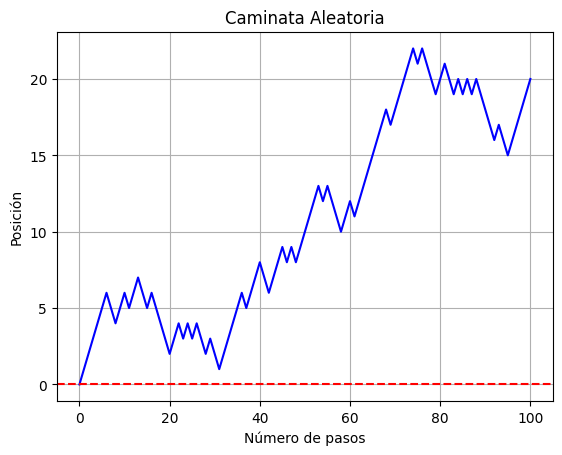

In [6]:
n=100 #Número de pasos
p=0.5 #Probabilidad p
_=caminata_aleatoria(n,p) #Se pone _= para que no genere la lista de los n datos, ya que solo se quiere ver la gráfica

# ÁNALISIS

* **Parámetros de Entrada:** La función recibe  (cantidad de pasos) y  (probabilidad de movimiento a la derecha), considerando  como el complemento para la izquierda.


* **Punto de Partida:** El proceso inicia siempre en el **origen ()** y utiliza un arreglo para registrar cada cambio de posición.

* **Dinámica Probabilística:** El movimiento depende de números **pseudoaleatorios**. Al usar , se mantiene una igualdad de probabilidad, haciendo que la trayectoria sea equilibrada y no favorezca ninguna dirección.
* **Control de Tendencia:** Es posible "favorecer" o sesgar la caminata hacia un lado aumentando o disminuyendo el valor de  respecto al .

 **Visualización de la Trayectoria:**
* Se genera una gráfica de la ruta seguida tras los  pasos.
* Incluye una **línea roja punteada** en el origen () que actúa como eje de referencia.

* **Interpretación:** La parte **superior** a la línea representa los movimientos a la **derecha**, mientras que la parte **inferior** representa los movimientos a la **izquierda**.


**Factores de Control y Comportamiento Asintótico**

* **Optimización de  (Pasos):** Se selecciona **** como un valor equilibrado; es lo suficientemente grande para apreciar la trayectoria sin saturar visualmente la gráfica.
* **Influencia de  (Probabilidad):** Esta variable determina el sesgo o "deriva" (*drift*) de la caminata:
* **:** Medida neutra, sin tendencia definida.
* **:** Tendencia hacia la izquierda (equivalente a una **pendiente negativa**).
* **:** Tendencia hacia la derecha (equivalente a una **pendiente positiva**).


* **Variabilidad vs. Determinismo:** Aunque existe una probabilidad dominante, la naturaleza pseudoaleatoria permite que ocurran eventos poco probables, generando trayectorias que no son rectilíneas, sino irregulares.
* **Ley de los Grandes Números :* A medida que el número de pasos crece, el promedio de los movimientos tiende a estabilizarse.
* Si  se aleja de la media (), la trayectoria se comporta cada vez más como una **recta definida**, ya que la variabilidad acumulada es menor comparada con la fuerza de la tendencia dominante.


Esto lleva a cuestionarse ciertos casos, por ejemplo:

1.   Con una probabilidad igualitaria, ¿Cuál es el promedio de que se regrese al origen?
2.   Si se tiene un $n$ pequeño ¿se ve muy afectada la trayectoria si se favorece con probabilidad a izquierda o derecha?
3.   ¿Cuál es la máxima distancia que alcanza con p igualitario?
4.   ¿Cuál es la mínima distancia que alcanza?

#PREGUNTAS

### Pregunta 1

#Con una probabilidad igualitaria, ¿Cuál es el promedio de que regrese al origen?

Solución y respuesta:

In [7]:
def caminata_aleatoria_datos(n,p):
  posicion=0
  camino=[posicion]
  for i in range(n):
    a=r.random()
    if a < p:
      posicion=posicion+1
    else:
      posicion=posicion-1
    camino.append(posicion)
  return camino

Se vuelve a llamar a la función "caminata_aleatoria" pero sin el apartado que gráfica para así solo analizar los datos y se cambia e nombre para que no afecte si posteriormente se desea graficar nuevamente

In [8]:
def origen(m, n, p):
    ceros = []

    for i in range(m):
        camino = caminata_aleatoria_datos(n, p)
        cantidad_ceros = camino.count(0)  # cuenta cuántas veces aparece 0
        ceros.append(cantidad_ceros)

    promedio = np.mean(ceros)
    return print("El promedio de veces que se regresa al origen es: ", promedio)

Se crea la función "origen" que realiza m iteraciones de la función caminata_aleatoria, cuenta los $0$ que hay en cada iteración, los guarda en una lista y posteriormente obtiene el promedio de dicha lista

In [9]:
m=100
n=100
p=0.5
origen(m, n, p)

El promedio de veces que se regresa al origen es:  8.23


Aquí el promedio de la lista con m valores, en cada iteración cambia, pero dicho promedio se encuentre aproximadamente entre un rango de $[6,9]$, esto cuando $p=0.5$, son equiprobables

### PREGUNTA 2

#Si se tiene un $n$ pequeño ¿se ve muy afectada la trayectoria si se favorece con probabilidad a izquierda o derecha?

Solución:

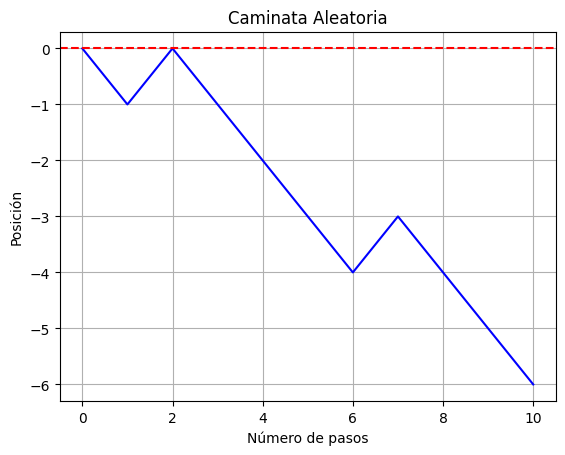

In [10]:
n=10
p=0.2
_=caminata_aleatoria(n,p)

Gráfica con $n, p$ pequeños, aunque la probabilidad favorezca al lado izquierda, por los pocos pasos que se dan, tiende a comportarse de manera no tan esperada

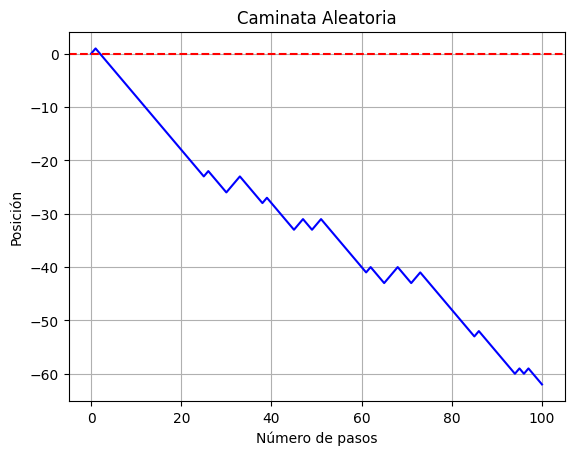

In [11]:
n=100
p=0.2
_=caminata_aleatoria(n,p)

Si influye n en la vista de la trayectoria, ya que con un $p$ alejado de la media, el recorrido puede arrojar un comportamiento parecido al de un $p$ equitativo, por otro lado para un $n$ grande se aprecia la ventaja hacia el lado izquierdo cuando $p$ es pequeño.
De manera análoga si $p$ es grande

#Pregunta 3

#¿Cuál es la máxima distancia que alcanza con p igualitario?

Solución y respuesta:

In [12]:
def maximo(m, n, p):
    maximos = []

    for i in range(m):
        camino = caminata_aleatoria_datos(n, p)
        max_caminata = max(camino)  # encuentra el máximo de esta caminata
        maximos.append(max_caminata)

    promedio = np.mean(maximos)
    return print("El máximo número que alcanza en promedio es: ", promedio)

Se crea una función análoga a la que busca los ceros, pero en esta ocasión, busca al máximo de cada iteración, los enlista y se saca el promedio

In [13]:
m=100
n=100
p=0.5

maximo(m,n,p)

El máximo número que alcanza en promedio es:  6.86


Se aprecía que el máximo parece tener una cota, ya que no crece de manera exponencial, esto también es debido a la probabilidad igualitaria, en otro caso, el máximo tiende a aumentar

#Pregunta 4

#¿Cuál es la mínima distancia que alcanza con p igualitario?

Solución y respuesta:

In [14]:
def minimo(m, n, p):
    minimos = []

    for i in range(m):
        camino = caminata_aleatoria_datos(n, p)
        min_caminata = min(camino)  # encuentra el máximo de esta caminata
        minimos.append(min_caminata)

    promedio = np.mean(minimos)
    return print("El mínimo número que alcanza en promedio es: ", promedio)

Se crea una función análoga a la de máximos, pero en esta ocasión, busca al mínimo

In [15]:
m=100
n=100
p=0.5

minimo(m,n,p)

El mínimo número que alcanza en promedio es:  -8.23


Aquí se observa un dato muy interesante, el cuál es que el promedio de máximos y mínimos pareciera ser en forma de espejo, ya que ambos oscilan entre los mismos valores pero con signo contrario